In [202]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_excel("Yurt-İçi_1740418548447.xlsx")
data=data.iloc[9:,:]
data.columns=data.iloc[0,:]
data=data.iloc[1:,:]
data

9,Sıra No,İl Adı,Kayıtlı Seçmen Sayısı,Oy Kullanan Seçmen Sayısı,İtirazsız Geçerli Oy Sayısı,İtirazlı Geçerli Oy Sayısı,Toplam Geçerli Oy,Toplam Geçersiz Oy,MİLLET,HAK-PAR,...,CHP,İYİ PARTİ,AP,ZAFER PARTİSİ,SOSYALİST GÜÇ BİRLİĞİ İTTİFAKI,CUMHUR İTTİFAKI,EMEK VE ÖZGÜRLÜK İTTİFAKI,MİLLET İTTİFAKI,ATA İTTİFAKI,BAĞIMSIZ TOPLAM OY
10,1,ADANA,1615326,1414930,1377893,438,1378331,36599,1411,873,...,392822,149935,0,29480,45,8594,310,5823,8,1018
11,2,ADIYAMAN,399303,327349,314939,0,314939,12410,515,387,...,58397,0,0,1955,21,1483,0,0,0,14806
12,3,AFYONKARAHİSAR,536910,484075,471236,12,471248,12827,831,426,...,86842,59015,0,10604,32,3230,16,1538,1,0
13,4,AĞRI,307114,223699,212256,1,212257,11442,125,285,...,22638,3466,463,0,20,588,2,133,3,57
14,5,AKSARAY,296566,257662,250593,324,250917,6745,377,220,...,0,63281,0,3379,29,2199,13,2,0,3007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,83,UŞAK,280741,255490,247618,0,247618,7872,247,220,...,71639,43858,871,4025,7,1113,12,1171,24,0
93,84,VAN,707861,556622,529619,5,529624,26998,277,865,...,43459,0,0,4101,66,2972,0,0,0,2565
94,85,YALOVA,204857,178510,174301,0,174301,4209,255,99,...,49891,16781,508,4030,3,889,22,690,26,0
95,86,YOZGAT,300575,260376,254447,684,255131,5245,337,285,...,0,59685,0,3323,13,2619,15,4,4,0


In [203]:
for col in data.columns[2:]:
    data[col]=data[col].astype(float)

In [204]:
cumhur=["AK PARTİ","MHP","BBP"]

In [205]:
cumhuroran=data[cumhur].div(data[cumhur].sum(axis=1), axis=0)
cumhuroylar=cumhuroran.mul(data["CUMHUR İTTİFAKI"], axis=0)
for col in cumhuroylar.columns:
    cumhuroylar[col]=cumhuroylar[col].astype(int)

In [206]:
data["AK PARTİ"] += cumhuroylar["AK PARTİ"]
data["MHP"] += cumhuroylar["MHP"]
data["BBP"] += cumhuroylar["BBP"]

In [207]:
millet=["CHP","İYİ PARTİ"]
milletoran=data[millet].div(data[millet].sum(axis=1), axis=0)
milletoran=milletoran.mul(data["MİLLET İTTİFAKI"], axis=0)
for col in milletoran.columns:
    milletoran[col]=milletoran[col].astype(int)

data["CHP"] += milletoran["CHP"]
data["İYİ PARTİ"] += milletoran["İYİ PARTİ"]

In [208]:
data=data.set_index("İl Adı")

In [209]:
data.loc["İSTANBUL"]=data.loc["İSTANBUL-1"]+data.loc["İSTANBUL-2"]+data.loc["İSTANBUL-3"]
data.loc["ANKARA"]=data.loc["ANKARA-1"]+data.loc["ANKARA-2"]+data.loc["ANKARA-3"]
data.loc["İZMİR"]=data.loc["İZMİR-1"]+data.loc["İZMİR-2"]
data.loc["BURSA"]=data.loc["BURSA-1"]+data.loc["BURSA-2"]

In [210]:
data=data.drop(["İSTANBUL-1","İSTANBUL-2","İSTANBUL-3","ANKARA-1","ANKARA-2","ANKARA-3","İZMİR-1","İZMİR-2","BURSA-1","BURSA-2"],axis=0)

In [211]:
data=data.rename(columns={"YEŞİL SOL PARTİ":"DEM"})
partiler=["AK PARTİ","CHP","MHP","İYİ PARTİ","YENİDEN REFAH","DEM","TİP","ZAFER PARTİSİ"]
data[partiler]

9,AK PARTİ,CHP,MHP,İYİ PARTİ,YENİDEN REFAH,DEM,TİP,ZAFER PARTİSİ
İl Adı,,,,,,,,
ADANA,419145.0,397036.0,152099.0,151543.0,24556.0,133770.0,31347.0,29480.0
ADIYAMAN,165419.0,58397.0,12859.0,0.0,15169.0,38042.0,0.0,1955.0
AFYONKARAHİSAR,208178.0,87757.0,76509.0,59637.0,14013.0,1507.0,1020.0,10604.0
AĞRI,52427.0,22753.0,4854.0,3483.0,4186.0,118684.0,0.0,0.0
AKSARAY,109856.0,0.0,53160.0,63283.0,6465.0,1477.0,628.0,3379.0
...,...,...,...,...,...,...,...,...
ZONGULDAK,156510.0,126862.0,32730.0,39880.0,9850.0,1287.0,1798.0,7064.0
İSTANBUL,3607690.0,2871569.0,612712.0,828381.0,331127.0,817610.0,410357.0,285221.0
ANKARA,1234476.0,1183072.0,392741.0,503804.0,103220.0,111746.0,45718.0,130407.0


In [212]:
oran_df=pd.DataFrame()
for parti in partiler:
    oran_df[parti]=(data[parti]/data[parti].sum(axis=0))

In [213]:
secmen=63847883

In [214]:
yerel=pd.read_excel("yerel.xlsx")
cols=yerel.iloc[0,:]
yerel.columns=cols
yerel=yerel.iloc[3::2]
yerel=yerel.set_index("İl Adı")
yerel=yerel.rename(columns={"DEM Parti":"DEM"})
for col in yerel.columns:
    yerel[col]=yerel[col].astype(float)
oran_df2=pd.DataFrame()
for parti in partiler:
    oran_df2[parti]=(yerel[parti]/yerel[parti].sum(axis=0))

In [215]:
nüfus=pd.read_excel("il tek yas ve cinsiyete gore nufus.xls")
nüfus=nüfus.iloc[6:249:3,:].sort_values(by="Unnamed: 1")

In [216]:
gecerlioy=nüfus.iloc[:,3]-nüfus.iloc[:,4:22].sum(axis=1)
gecerlioy.index=nüfus["Unnamed: 1"].str.upper().values

In [217]:
oran_df1=oran_df*0.5+oran_df2*0.5

In [218]:
anket=pd.read_excel("anket.xlsx")
cols=anket.iloc[1,:]
anket.columns=cols
anket=anket.iloc[3:]

anket=pd.concat([anket.iloc[:-22][::-1],anket.iloc[-22:][::-1]],axis=0)
anket["Tarih"]=anket["Tarih"].astype(str)
anket["Tarih"]=anket["Tarih"].apply(lambda x: x.split(" ")[-1])

In [219]:
anket["Tarih"] = anket["Tarih"].replace("Şubat", "Şub")
anket["Tarih"] = anket["Tarih"].replace("Ocak", "Oca")
anket["Tarih"] = anket["Tarih"].replace("Aralık", "Ara")
anket["Tarih"] = anket["Tarih"].replace("Kasım", "Kas")
anket["Tarih"] = anket["Tarih"].replace("Ekim", "Eki")
anket["Tarih"] = anket["Tarih"].replace("Eylül", "Eyl")
anket["Tarih"] = anket["Tarih"].replace("Ağustos", "Ağu")
anket["Tarih"] = anket["Tarih"].replace("Temmuz", "Tem")
anket["Tarih"] = anket["Tarih"].replace("Haziran", "Haz")
anket["Tarih"] = anket["Tarih"].replace("Mayıs", "May")
anket["Tarih"] = anket["Tarih"].replace("Nisan", "Nis")
anket["Tarih"] = anket["Tarih"].replace("Mart", "Mar")
anket.loc[36,"Tarih"]="Eki"
anket.loc[130,"Tarih"]="Oca"

In [220]:
puanlar=pd.DataFrame()
puanlar["Anket şirketi"]=["BETİMAR","Optimar","Asal","Areda Survey","TÜSİAR","KONDA","GENAR","Özdemir","ADA","HBS","SONAR","Aksoy","İEA","MetroPOLL","MAK","AREA","SAROS","PİAR","ORC","Yöneylem","ALF"]
puanlar["Puan"]=[2.92,1.72,1.54,1.41,1.26,1.18,1.07,1.04,0.92,0.89,0.77,0.6,0.55,0.51,0.5,0.48,0.43,0.4,0.33,0.19,0.16]
puanlar=puanlar.set_index("Anket şirketi")
puanlar

,Puan
Anket şirketi,
BETİMAR,2.92
Optimar,1.72
Asal,1.54
Areda Survey,1.41
TÜSİAR,1.26
KONDA,1.18
GENAR,1.07
Özdemir,1.04
ADA,0.92


In [221]:
anket=anket.set_index("Anket şirketi")
anket["Puan"]=puanlar["Puan"]
anket=anket.dropna()
anket

1,Tarih,Örneklem,AKP,CHP,MHP,DEM,İYİ,ZP,YRP,TİP,Diğer,Puan
Anket şirketi,,,,,,,,,,,,
KONDA,Oca,–,32.7,23.2,12.3,11.3,7.9,–,–,–,12.6,1.18
MetroPOLL,Oca,1565,34.6,25.1,9,10.3,10.1,3.2,1.9,1.3,4.5,0.51
Asal,Oca,2000,34.8,23.2,9.7,9.4,8.5,3.7,4.8,2.1,3.8,1.54
HBS,Şub,6100,36.8,24.2,11,9.4,8.1,2.9,4.2,–,3.4,0.89
KONDA,Şub,–,32.5,23.7,9.5,10.4,7.4,–,–,–,16.6,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...
TÜSİAR,Şub,1600,29.7,31.5,8.7,9.3,4.1,4.2,4.3,1.3,4.1,1.26
Özdemir,Şub,2021,30.7,31.4,10.9,7.6,4.4,5.2,3.8,2.3,2.3,1.04
ORC,Şub,3130,29.5,29.1,7.5,8.6,5.1,4.7,5,1.1,7.8,0.33


In [222]:
for i in range(93):
    anket["Tarih"].iloc[i] += " 2024"

for i in range(93,len(anket)):
    anket["Tarih"].iloc[i] += " 2025"

C:\Users\Bora\AppData\Local\Temp\ipykernel_21320\3817691818.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  anket["Tarih"].iloc[i] += " 2024"
C:\Users\Bora\AppData\Local\Temp\ipykernel_21320\3817691818.py:2: FutureWarning: ChainedAssignm

In [223]:
anket=anket.reset_index()
anket=anket.set_index("Tarih")

In [224]:
parties = ["AKP", "CHP", "MHP", "DEM", "İYİ", "ZP", "YRP", "TİP"]
anket[parties] = anket[parties].apply(pd.to_numeric, errors='coerce')
# Function to compute weighted average
def weighted_avg(group):
    weights = group['Puan']
    return (group[parties].multiply(weights, axis=0).sum() / weights.sum())

# Group by 'Tarih' and calculate weighted averages
weighted_averages = anket.groupby(anket.index).apply(weighted_avg)
weighted_averages=weighted_averages.loc[anket.index.unique()]

In [225]:
weighted_averages.iloc[2]=[32.37,35.46,5.86,5.63,4.59,2.57,6.99,0.61]

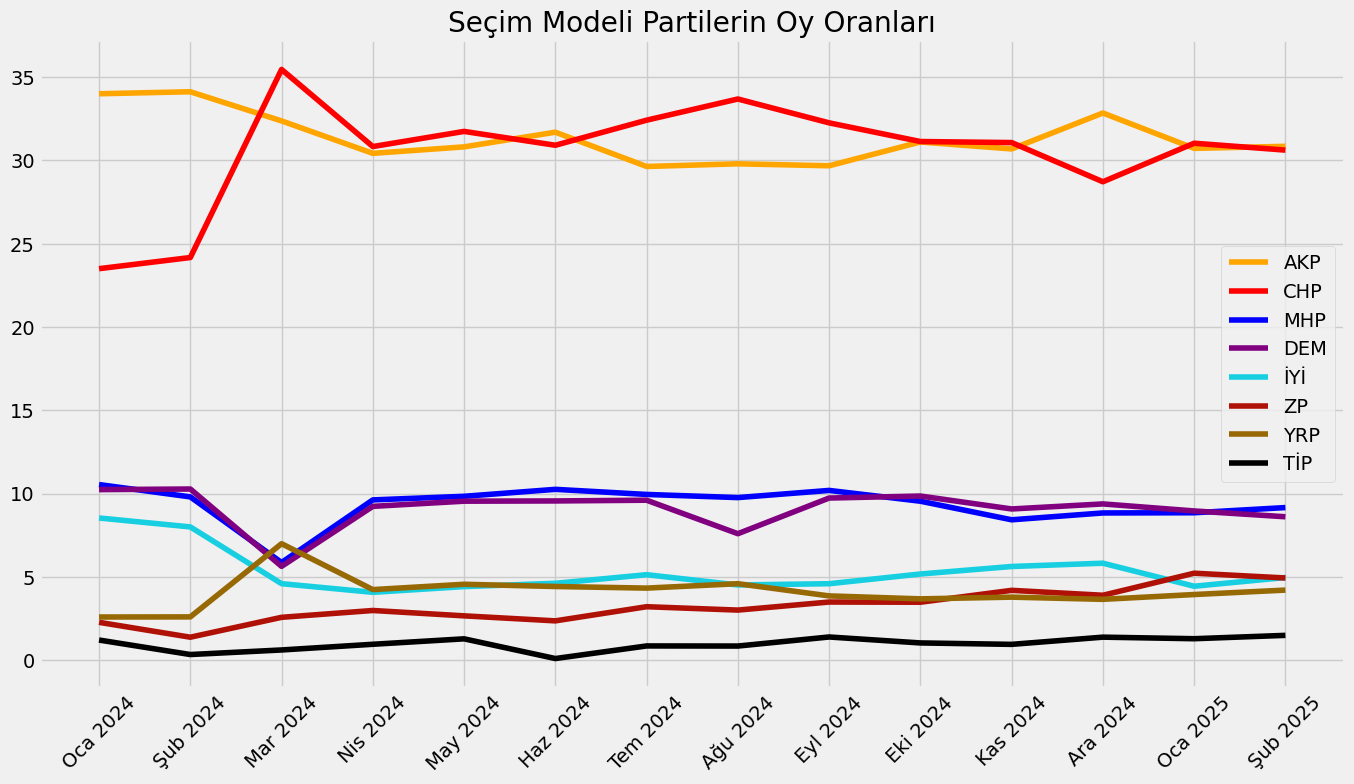

In [226]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Seçim Modeli Partilerin Oy Oranları")
plt.plot(weighted_averages["AKP"],label="AKP",color="orange")
plt.plot(weighted_averages["CHP"],label="CHP",color="red")
plt.plot(weighted_averages["MHP"],label="MHP",color="blue")
plt.plot(weighted_averages["DEM"],label="DEM",color="purple")
plt.plot(weighted_averages["İYİ"],label="İYİ",color="#17cfe1")
plt.plot(weighted_averages["ZP"],label="ZP",color="#b01107")
plt.plot(weighted_averages["YRP"],label="YRP",color="#976905")
plt.plot(weighted_averages["TİP"],label="TİP",color="black")
plt.xticks(weighted_averages.index,rotation=45)
plt.legend()

In [227]:
oran_df1.columns=["AKP","CHP","MHP","İYİ","YRP","DEM","TİP","ZP"]

In [228]:
gecerlioy=pd.DataFrame(gecerlioy)
gecerlioy["City"]=gecerlioy.index
gecerlioy

,0,City
ADANA,1652101.0,ADANA
ADIYAMAN,414082.0,ADIYAMAN
AFYONKARAHISAR,568344.0,AFYONKARAHISAR
AKSARAY,318323.0,AKSARAY
AMASYA,272256.0,AMASYA
...,...,...
ÇORUM,411501.0,ÇORUM
İSTANBUL,11986847.0,İSTANBUL
İZMIR,3562064.0,İZMIR
ŞANLIURFA,1257164.0,ŞANLIURFA


In [229]:
# Eski ve yeni indexleri belirleyelim
old_indexes = ['AFYONKARAHISAR', 'ARTVIN', 'BALIKESIR', 'BILECIK', 'BINGÖL', 'BITLIS', 'DENIZLI', 'DIYARBAKIR', 'EDIRNE', 'ERZINCAN', 
               'ESKIŞEHIR', 'GAZIANTEP', 'GIRESUN', 'HAKKARI', 'KAYSERI', 'KILIS', 'KOCAELI', 'KIRKLARELI', 'KIRŞEHIR', 'MANISA', 
               'MARDIN', 'MERSIN', 'NEVŞEHIR', 'NIĞDE', 'OSMANIYE', 'RIZE', 'SIIRT', 'SINOP', 'SIVAS', 'TEKIRDAĞ', 'TUNCELI', 'İZMIR']
new_indexes = ['AFYONKARAHİSAR', 'ARTVİN', 'BALIKESİR', 'BİLECİK', 'BİNGÖL', 'BİTLİS', 'DENİZLİ', 'DİYARBAKIR', 'EDİRNE', 'ERZİNCAN', 
               'ESKİŞEHİR', 'GAZİANTEP', 'GİRESUN', 'HAKKARİ', 'KAYSERİ', 'KİLİS', 'KOCAELİ', 'KIRKLARELİ', 'KIRŞEHİR', 'MANİSA', 
               'MARDİN', 'MERSİN', 'NEVŞEHİR', 'NİĞDE', 'OSMANİYE', 'RİZE', 'SİİRT', 'SİNOP', 'SİVAS', 'TEKİRDAĞ', 'TUNCELİ', 'İZMİR']



# Eski indexleri yeni indexlerle değiştirelim
gecerlioy['City'] = gecerlioy['City'].apply(lambda x: new_indexes[old_indexes.index(x)] if x in old_indexes else x)
gecerlioy=gecerlioy.set_index("City")
gecerlioy=gecerlioy[0]


In [230]:
gecerlioy.name=""        
gecerlioy.index.name=""

In [231]:
mv=pd.read_excel("MV.xlsx",header=None)

mv=mv[[0,2]]
mv=mv.dropna()
mv.columns=["City","Milletvekili"]
mv["City"]=mv["City"].str.upper()
old_indexes = ['AFYONKARAHISAR', 'ARTVIN', 'BALIKESIR', 'BILECIK', 'BINGÖL', 'BITLIS', 'DENIZLI', 'DIYARBAKIR', 'EDIRNE', 'ERZINCAN', 
               'ESKIŞEHIR', 'GAZIANTEP', 'GIRESUN', 'HAKKÂRI', 'KAYSERI', 'KILIS', 'KOCAELI', 'KIRKLARELI', 'KIRŞEHIR', 'MANISA', 
               'MARDIN', 'MERSIN', 'NEVŞEHIR', 'NIĞDE', 'OSMANIYE', 'RIZE', 'SIIRT', 'SINOP', 'SIVAS', 'TEKIRDAĞ', 'TUNCELI', 'İZMIR']
new_indexes = ['AFYONKARAHİSAR', 'ARTVİN', 'BALIKESİR', 'BİLECİK', 'BİNGÖL', 'BİTLİS', 'DENİZLİ', 'DİYARBAKIR', 'EDİRNE', 'ERZİNCAN', 
               'ESKİŞEHİR', 'GAZİANTEP', 'GİRESUN', 'HAKKARİ', 'KAYSERİ', 'KİLİS', 'KOCAELİ', 'KIRKLARELİ', 'KIRŞEHİR', 'MANİSA', 
               'MARDİN', 'MERSİN', 'NEVŞEHİR', 'NİĞDE', 'OSMANİYE', 'RİZE', 'SİİRT', 'SİNOP', 'SİVAS', 'TEKİRDAĞ', 'TUNCELİ', 'İZMİR']



# Eski indexleri yeni indexlerle değiştirelim
mv['City'] = mv['City'].apply(lambda x: new_indexes[old_indexes.index(x)] if x in old_indexes else x)
mv=mv.set_index("City")
mv

,Milletvekili
City,
ADANA,15.0
ADIYAMAN,5.0
AFYONKARAHİSAR,6.0
AĞRI,4.0
AMASYA,3.0
...,...
YALOVA,3.0
KARABÜK,3.0
KİLİS,2.0


In [232]:
import pandas as pd
dağılım=pd.DataFrame()
for tarih in weighted_averages.index:
    oylar=pd.DataFrame(index=oran_df1.index,columns=weighted_averages.columns)

    for parti in parties:
        oylar[parti]=oran_df1[parti]*gecerlioy.sum()*(weighted_averages[parti].loc[tarih]/100)

    oylar["Sayı"]=mv["Milletvekili"]
    # List of parties that passed the threshold
    passing_parties = ["AKP", "CHP", "MHP", "DEM", "TİP"]
    oylar[passing_parties]=oylar[passing_parties].astype(int)
    oylar["Sayı"]=oylar["Sayı"].astype(int)
    # Function to apply D'Hondt method to each region
    def dhondt_method(row, num_seats):
        # Filter out the passing parties
        filtered_row = row[passing_parties]
        
        # Initialize an empty list to store the seats per party
        seats = {party: 0 for party in filtered_row.index}
        
        # Create a list of quotients for the D'Hondt method
        quotients = []
        for party in filtered_row.index:
            quotients.append([party, filtered_row[party] / 1])
        
        # Allocate seats
        for _ in range(num_seats):
            quotients.sort(key=lambda x: x[1], reverse=True)
            selected_party = quotients[0][0]
            seats[selected_party] += 1
            quotients[0][1] = filtered_row[selected_party] / (seats[selected_party] + 1)  # Update the quotient
            
        return seats

    # Apply the D'Hondt method for each region
    seats_distribution = {}
    for region in oylar.index:
        seats_distribution[region] = dhondt_method(oylar.loc[region], oylar.loc[region, "Sayı"])

    # Show the result
    seats_distribution=pd.DataFrame(seats_distribution).T
    seats_distribution=pd.DataFrame(seats_distribution.sum()).T
    dağılım=pd.concat([dağılım,seats_distribution],axis=0)


In [233]:
dağılım.index=weighted_averages.index
dağılım["Cumhur"]=dağılım["AKP"]+dağılım["MHP"]
dağılım["Emek ve Özgürlük"]=dağılım["DEM"]+dağılım["TİP"]


In [234]:
dağılım.to_csv("dağılımiyizp.csv")

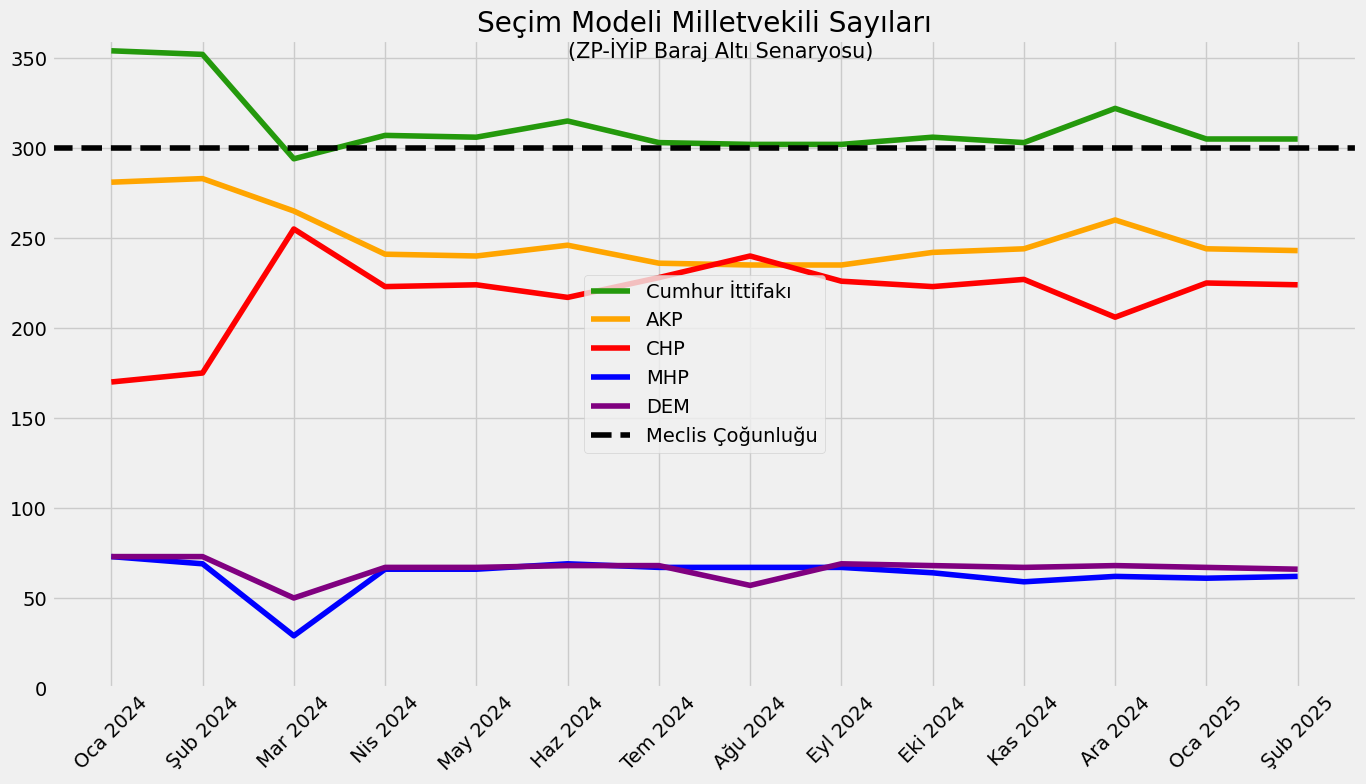

In [235]:

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Seçim Modeli Milletvekili Sayıları")
plt.text(x="Haz 2024",y=350,s="(ZP-İYİP Baraj Altı Senaryosu)",fontsize=15)
plt.plot(dağılım["Cumhur"],label="Cumhur İttifakı",color="#24990c")
plt.plot(dağılım["AKP"],label="AKP",color="orange")
plt.plot(dağılım["CHP"],label="CHP",color="red")
plt.plot(dağılım["MHP"],label="MHP",color="blue")
plt.plot(dağılım["DEM"],label="DEM",color="purple")
"""plt.plot(dağılım["ZP"],label="ZP",color="magenta")
plt.plot(dağılım["İYİ"],label="İYİ",color="#17e8e8")"""
plt.axhline(y=300,linestyle="--",color="black",label="Meclis Çoğunluğu")
plt.xticks(dağılım.index,rotation=45)
plt.ylim(0,360)
plt.legend(loc=0)

In [236]:
oranlar=pd.DataFrame()
for col in oylar.columns[:-1]:
    oranlar[col]=(oylar[col]/gecerlioy)*100

In [237]:


for i in range(len(oranlar)):
    if oranlar.sum(axis=1).iloc[i]>100:
        oranlar.iloc[i]=(oylar.iloc[i,:-1]/oylar.iloc[i,:-1].sum())*100

In [238]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

shapefile_tr = gpd.read_file('turkey_administrativelevels0_1_2/tur_polbnda_adm1.shp')

In [239]:
oranlar=oranlar.reset_index()
oranlar=oranlar.rename(columns={"index":"PROVINCE"})

In [240]:
gdf = gpd.read_file('turkey_administrativelevels0_1_2/tur_polbnda_adm1.shp')
oranlar=pd.read_csv("Şub 2025.csv")
oranlar.loc[oranlar["İl Adı"]=="ESKİŞEHİR","İl Adı"]="ESKİŞEHIR"

# Shapefile ile veri birleştirme (il adı üzerinden)
gdf = gdf.merge(oranlar, left_on='adm1_tr', right_on='İl Adı')

In [241]:
merged_df = pd.merge(
  shapefile_tr,
  oranlar,
  left_on='adm1_tr',
  right_on='İl Adı',
  how='left'
)

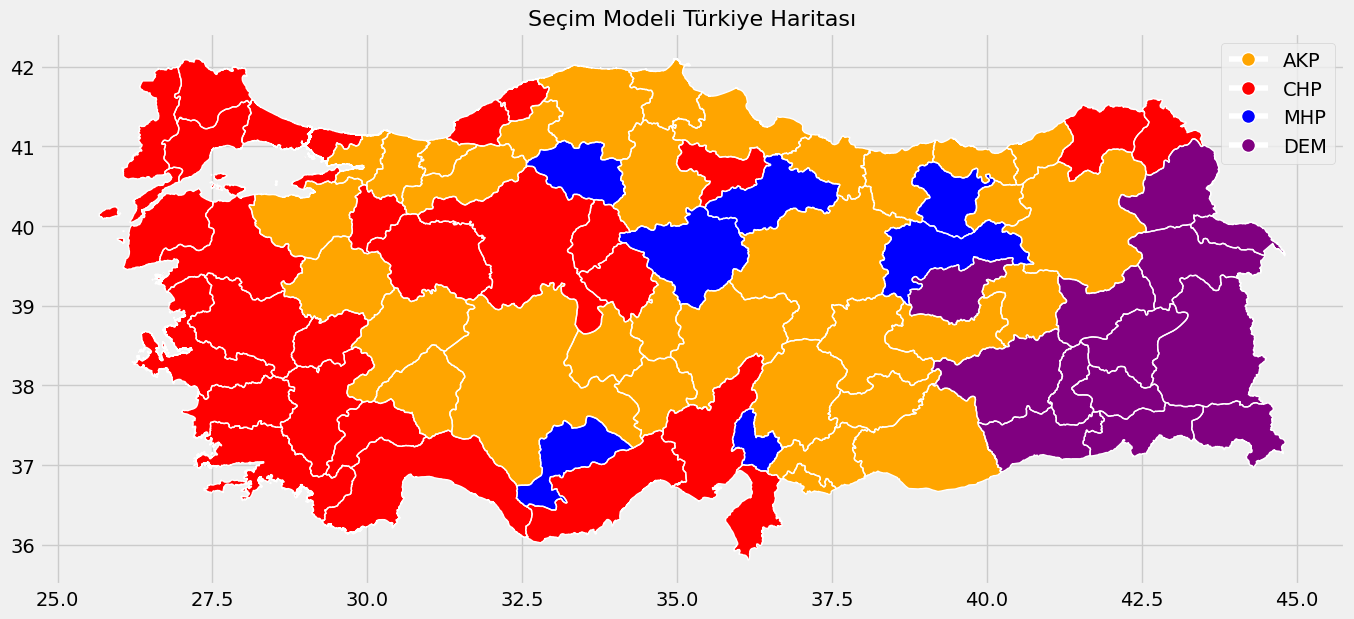

In [242]:
merged_df['winning_party'] = merged_df[['AKP', 'CHP', 'MHP', 'DEM', 'TİP']].idxmax(axis=1)

# Renkler için bir sözlük oluştur
party_colors = {
    'AKP': 'orange',
    'CHP': 'red',
    'MHP': 'blue',
    'DEM': 'purple'
}

# Renkleri yeni bir sütunda belirleyin
merged_df['color'] = merged_df['winning_party'].map(party_colors)

# Haritayı çiz
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_df.plot(ax=ax, color=merged_df['color'], legend=True)
merged_df.boundary.plot(ax=ax, linewidth=1, color='white')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in party_colors.values()]
labels = party_colors.keys()
ax.legend(handles=handles, labels=labels, title="", loc='upper right')
plt.title('Seçim Modeli Türkiye Haritası', fontsize=16)
plt.show()


In [243]:
import pandas as pd
oranlar=pd.DataFrame(index=oran_df1.index,columns=weighted_averages.columns)
for tarih in weighted_averages.index:
    oylar=pd.DataFrame(index=oran_df1.index,columns=weighted_averages.columns)

    for parti in parties:
        oylar[parti]=oran_df1[parti]*gecerlioy.sum()*(weighted_averages[parti].loc[tarih]/100)

    for col in oylar.columns:
        oranlar[col]=(oylar[col]/gecerlioy)*100
    for i in range(len(oranlar)):
        if oranlar.sum(axis=1).iloc[i]>100:
            oranlar.iloc[i]=(oylar.iloc[i]/oylar.iloc[i].sum())*100
    oranlar.to_csv(f"{tarih}.csv")

  
    



In [244]:
import pandas as pd
dağılım=pd.DataFrame()
for tarih in weighted_averages.index:
    oylar=pd.DataFrame(index=oran_df1.index,columns=weighted_averages.columns)

    for parti in parties:
        oylar[parti]=oran_df1[parti]*gecerlioy.sum()*(weighted_averages[parti].loc[tarih]/100)

    oylar["Sayı"]=mv["Milletvekili"]
    # List of parties that passed the threshold
    passing_parties = ["AKP", "CHP", "MHP", "DEM", "TİP","İYİ","ZP"]
    oylar[passing_parties]=oylar[passing_parties].astype(int)
    oylar["Sayı"]=oylar["Sayı"].astype(int)
    # Function to apply D'Hondt method to each region
    def dhondt_method(row, num_seats):
        # Filter out the passing parties
        filtered_row = row[passing_parties]
        
        # Initialize an empty list to store the seats per party
        seats = {party: 0 for party in filtered_row.index}
        
        # Create a list of quotients for the D'Hondt method
        quotients = []
        for party in filtered_row.index:
            quotients.append([party, filtered_row[party] / 1])
        
        # Allocate seats
        for _ in range(num_seats):
            quotients.sort(key=lambda x: x[1], reverse=True)
            selected_party = quotients[0][0]
            seats[selected_party] += 1
            quotients[0][1] = filtered_row[selected_party] / (seats[selected_party] + 1)  # Update the quotient
            
        return seats

    # Apply the D'Hondt method for each region
    seats_distribution = {}
    for region in oylar.index:
        seats_distribution[region] = dhondt_method(oylar.loc[region], oylar.loc[region, "Sayı"])

    # Show the result
    seats_distribution=pd.DataFrame(seats_distribution).T
    seats_distribution.to_csv(f"MV_{tarih}_iyizp.csv")
    


In [ ]:
import pandas as pd
dağılım=pd.DataFrame()
for tarih in weighted_averages.index:
    oylar=pd.DataFrame(index=oran_df1.index,columns=weighted_averages.columns)

    for parti in parties:
        oylar[parti]=oran_df1[parti]*gecerlioy.sum()*(weighted_averages[parti].loc[tarih]/100)

    oylar["Sayı"]=mv["Milletvekili"]
    # List of parties that passed the threshold
    passing_parties = ["AKP", "CHP", "MHP", "DEM", "TİP","İYİ","ZP"]
    oylar[passing_parties]=oylar[passing_parties].astype(int)
    oylar["Sayı"]=oylar["Sayı"].astype(int)
    # Function to apply D'Hondt method to each region
    def dhondt_method(row, num_seats):
        # Filter out the passing parties
        filtered_row = row[passing_parties]
        
        # Initialize an empty list to store the seats per party
        seats = {party: 0 for party in filtered_row.index}
        
        # Create a list of quotients for the D'Hondt method
        quotients = []
        for party in filtered_row.index:
            quotients.append([party, filtered_row[party] / 1])
        
        # Allocate seats
        for _ in range(num_seats):
            quotients.sort(key=lambda x: x[1], reverse=True)
            selected_party = quotients[0][0]
            seats[selected_party] += 1
            quotients[0][1] = filtered_row[selected_party] / (seats[selected_party] + 1)  # Update the quotient
            
        return seats

    # Apply the D'Hondt method for each region
    seats_distribution = {}
    for region in oylar.index:
        seats_distribution[region] = dhondt_method(oylar.loc[region], oylar.loc[region, "Sayı"])

    # Show the result
    seats_distribution=pd.DataFrame(seats_distribution).T
    seats_distribution.to_csv(f"MV_{tarih}.csv")
    


In [185]:
dağılım.to_csv("dağılımiyizp.csv")

In [189]:
mv=pd.read_csv("MV_Şub 2025.csv",index_col=0)
mv=mv.sum()
mv=pd.DataFrame(mv)

In [191]:
data = {
    "PARTIDO": list(mv.index.values),
    "COLOR": ['#FF5733', '#FFCC00', '#0000FF', '#800080', '#6600CC'],
    "NAME": list(mv.index.values),
    "SEATS": list(mv.values.reshape(1,-1)[0]),
}

df = pd.DataFrame(data)

In [192]:
df

,PARTIDO,COLOR,NAME,SEATS
0,AKP,#FF5733,AKP,243
1,CHP,#FFCC00,CHP,224
2,MHP,#0000FF,MHP,62
3,DEM,#800080,DEM,66
4,TİP,#6600CC,TİP,5


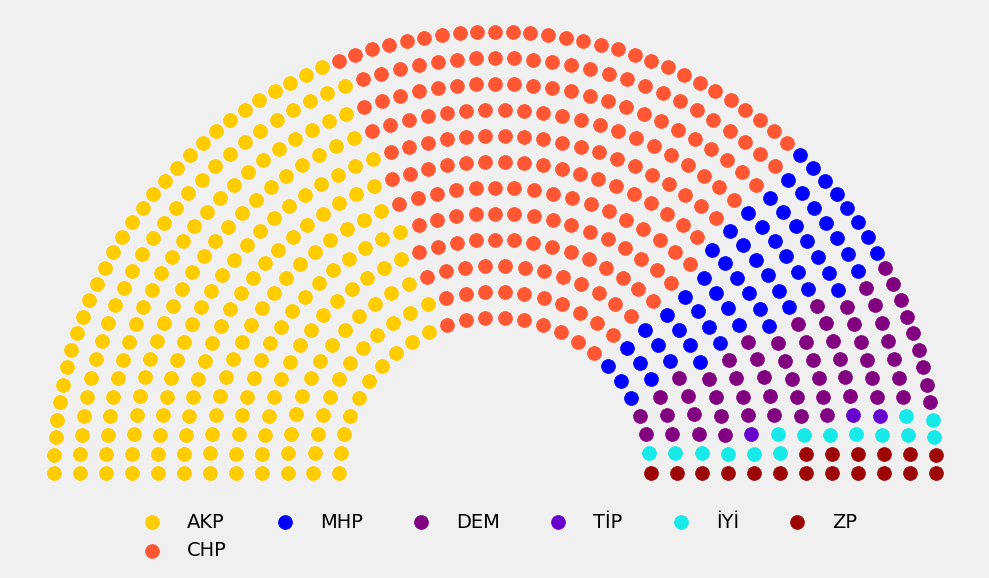

In [199]:
mv=pd.read_csv("MV_Şub 2025_iyizp.csv",index_col=0)
mv=mv.sum()
mv=pd.DataFrame(mv)
from collections import namedtuple, defaultdict
# Parlamento Verisi (Örnek)
data = {
    "PARTIDO": list(mv.index.values),
    "COLOR": [ '#FFCC00','#FF5733', '#0000FF', '#800080', '#6600CC','#17e8e8','#9d0404'],
    "NAME": list(mv.index.values),
    "SEATS": list(mv.values.reshape(1,-1)[0]),
}

df = pd.DataFrame(data)

Party = namedtuple('Party', ['name', 'color', 'size'])
parties = [Party(row['PARTIDO'], row['COLOR'], row['SEATS']) for _, row in df.iterrows()]
NUM_DEPUTIES = sum(p.size for p in parties)

# Fonksiyonlar
def calculate_radius(num_rows, initial_radius, radius_increment):
    """Calculate the radius for each row."""
    return [initial_radius + i * radius_increment for i in range(num_rows)]

def calculate_arc_lengths(radius):
    """Calculate the arc lengths for each radius."""
    return [r * np.pi for r in radius]

def calculate_deputies_per_row(num_deputies, arc_lengths, total_arc_length):
    """Calculate the number of deputies per row."""
    deputies_per_row = [int(num_deputies * (arc_length / total_arc_length)) for arc_length in arc_lengths]

    # Distribute the remaining deputies
    diff = num_deputies - sum(deputies_per_row)
    deputies_per_row[-1] += diff
    return deputies_per_row

def generate_points(num_rows, radii, deputies_per_row):
    """Generate the points for each deputy."""
    points = []
    for row in range(num_rows):
        radius = radii[row]
        num_deputies_row = deputies_per_row[row]
        angles = np.linspace(0, np.pi, num_deputies_row)  # Spread deputies across the semicircle
        x = radius * np.cos(angles)
        y = radius * np.sin(angles)
        for i in range(num_deputies_row):
            points.append((radius, angles[i], x[i], y[i]))
    return sorted(points, key=lambda x: x[1], reverse=True)

def main(num_rows, initial_radius, radius_increment):
    """Main function to generate deputies' positions."""
    radius = calculate_radius(num_rows, initial_radius, radius_increment)
    arc_lengths = calculate_arc_lengths(radius)
    total_arc_length = sum(arc_lengths)
    deputies_per_row = calculate_deputies_per_row(NUM_DEPUTIES, arc_lengths, total_arc_length)
    points = generate_points(num_rows, radius, deputies_per_row)

    Deputy = namedtuple('Deputy', ['x', 'y', 'radius', 'angle'])
    return [Deputy(x, y, radius, angle) for (radius, angle, x, y) in points]

def plot_deputies(deputies, parties, POINT_SIZE):
    """Plot the deputies on a chart."""
    deputies_by_party = defaultdict(list)

    current_index = 0

    for party in parties:
        party_deputies = deputies[current_index:current_index + party.size]
        deputies_by_party[party.name].extend(party_deputies)
        current_index += party.size

    deputies_by_party = dict(deputies_by_party)

    fig, ax = plt.subplots(figsize=(12, 6))

    for party in parties:
        color = party.color
        party_deputies = deputies_by_party[party.name]

        label = party.name

        for deputy in party_deputies:
            if color == 'unassigned':
                ax.scatter(deputy.x, deputy.y, s=POINT_SIZE, facecolors='none', edgecolors='grey', linewidth=0.75, label=label)
            else:
                ax.scatter(deputy.x, deputy.y, s=POINT_SIZE, alpha=1, color=color, label=label)
            label = ""

    ax.set_aspect('equal')
    ax.axis('off')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=6, frameon=False)

# Constants
NUM_ROWS = 12
INITIAL_RADIUS = 30
RADIUS_INCREMENT = 5
POINT_SIZE = 100

deputies = main(NUM_ROWS, INITIAL_RADIUS, RADIUS_INCREMENT)

# Plot the deputies and show the plot in Streamlit
fig = plot_deputies(deputies, parties, POINT_SIZE)
party_seats = [f"**{party.name}: {party.size}**" for party in parties]


plt.tight_layout()
plt.savefig("parlemento_zpiyip.png")
plt.show(fig)

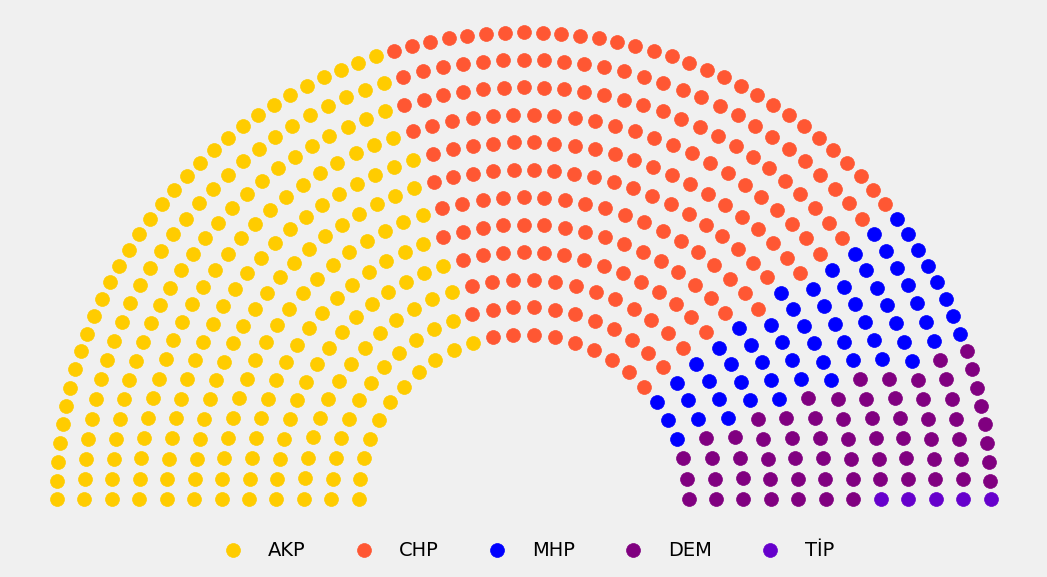

In [200]:
mv=pd.read_csv("MV_Şub 2025.csv",index_col=0)
mv=mv.sum()
mv=pd.DataFrame(mv)
from collections import namedtuple, defaultdict
# Parlamento Verisi (Örnek)
data = {
    "PARTIDO": list(mv.index.values),
    "COLOR": [ '#FFCC00','#FF5733', '#0000FF', '#800080', '#6600CC'],
    "NAME": list(mv.index.values),
    "SEATS": list(mv.values.reshape(1,-1)[0]),
}

df = pd.DataFrame(data)

Party = namedtuple('Party', ['name', 'color', 'size'])
parties = [Party(row['PARTIDO'], row['COLOR'], row['SEATS']) for _, row in df.iterrows()]
NUM_DEPUTIES = sum(p.size for p in parties)

# Fonksiyonlar
def calculate_radius(num_rows, initial_radius, radius_increment):
    """Calculate the radius for each row."""
    return [initial_radius + i * radius_increment for i in range(num_rows)]

def calculate_arc_lengths(radius):
    """Calculate the arc lengths for each radius."""
    return [r * np.pi for r in radius]

def calculate_deputies_per_row(num_deputies, arc_lengths, total_arc_length):
    """Calculate the number of deputies per row."""
    deputies_per_row = [int(num_deputies * (arc_length / total_arc_length)) for arc_length in arc_lengths]

    # Distribute the remaining deputies
    diff = num_deputies - sum(deputies_per_row)
    deputies_per_row[-1] += diff
    return deputies_per_row

def generate_points(num_rows, radii, deputies_per_row):
    """Generate the points for each deputy."""
    points = []
    for row in range(num_rows):
        radius = radii[row]
        num_deputies_row = deputies_per_row[row]
        angles = np.linspace(0, np.pi, num_deputies_row)  # Spread deputies across the semicircle
        x = radius * np.cos(angles)
        y = radius * np.sin(angles)
        for i in range(num_deputies_row):
            points.append((radius, angles[i], x[i], y[i]))
    return sorted(points, key=lambda x: x[1], reverse=True)

def main(num_rows, initial_radius, radius_increment):
    """Main function to generate deputies' positions."""
    radius = calculate_radius(num_rows, initial_radius, radius_increment)
    arc_lengths = calculate_arc_lengths(radius)
    total_arc_length = sum(arc_lengths)
    deputies_per_row = calculate_deputies_per_row(NUM_DEPUTIES, arc_lengths, total_arc_length)
    points = generate_points(num_rows, radius, deputies_per_row)

    Deputy = namedtuple('Deputy', ['x', 'y', 'radius', 'angle'])
    return [Deputy(x, y, radius, angle) for (radius, angle, x, y) in points]

def plot_deputies(deputies, parties, POINT_SIZE):
    """Plot the deputies on a chart."""
    deputies_by_party = defaultdict(list)

    current_index = 0

    for party in parties:
        party_deputies = deputies[current_index:current_index + party.size]
        deputies_by_party[party.name].extend(party_deputies)
        current_index += party.size

    deputies_by_party = dict(deputies_by_party)

    fig, ax = plt.subplots(figsize=(12, 6))

    for party in parties:
        color = party.color
        party_deputies = deputies_by_party[party.name]

        label = party.name

        for deputy in party_deputies:
            if color == 'unassigned':
                ax.scatter(deputy.x, deputy.y, s=POINT_SIZE, facecolors='none', edgecolors='grey', linewidth=0.75, label=label)
            else:
                ax.scatter(deputy.x, deputy.y, s=POINT_SIZE, alpha=1, color=color, label=label)
            label = ""

    ax.set_aspect('equal')
    ax.axis('off')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=6, frameon=False)

# Constants
NUM_ROWS = 12
INITIAL_RADIUS = 30
RADIUS_INCREMENT = 5
POINT_SIZE = 100

deputies = main(NUM_ROWS, INITIAL_RADIUS, RADIUS_INCREMENT)

# Plot the deputies and show the plot in Streamlit
fig = plot_deputies(deputies, parties, POINT_SIZE)
party_seats = [f"**{party.name}: {party.size}**" for party in parties]


plt.tight_layout()
plt.savefig("parlemento.png")
plt.show(fig)